# Average weight

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


def save_weight_graph(file_name, fileformat="pdf", folder_output="", dpi=300, label="avg_weights", value_horizontal_line = 0.6):

    df = pd.read_csv(f"{file_name}")
    df = df[["0_00", "0_01", "0_02"]]
    df.rename(columns={"0_00": "0", "0_01": "1", "0_02": "2"}, inplace=True)

    sns.set(style="ticks")
    sns.set_context("talk")
    fig, ax = plt.subplots(figsize=(8 , 6))

    plt.axhline(value_horizontal_line, color='k', linewidth=1, linestyle="--")
    markers = [None,"o", "s"]
    colors = ["k", "g", "r"]
    for i, c in enumerate(df.columns):
        plt.plot(
            df[c],
            linewidth=1,
            color=colors[i],
            marker=markers[i],
            markevery=25,
            fillstyle="none",
            label=c)

    plt.legend(
        loc="lower right",
        frameon=False,
        bbox_to_anchor=(1, 0, 0, 1),  # (0.5, -0.15),
        ncol=1,
        # title="Max. #cars/location"
    )

    ax.set_xlim(0, len(df))
    ax.set_ylim(0,0.7)
    plt.xlabel("Iteration")
    plt.ylabel("Average weight")

    output_path = f"{folder_output}/weight_comparison_{label}.{fileformat}"
    print(f"Saving in \"{output_path}\"")
    plt.savefig(output_path, bbox_inches="tight", dpi=dpi)

Reading C:/Users/LocalAdmin/OneDrive/leap_forward/phd_project/reb/code/mod/data/output/A20_B80_TS_0.10(S)_[P]_LIN_R=[1-8][0-10]_V=0300_L[3]=(00-0-, 11-0-, 12-0-)_[L(05)]I=1_1.00_0.10_C=0.10_A_4.80_05_05_4.80_0.00_P_B_2.40_10_05_2.80_0.00_P/adp/train/overall_stats.csv...
Reading C:/Users/LocalAdmin/OneDrive/leap_forward/phd_project/reb/code/mod/data/output/A10_TS_0.10(S)_[P]_LIN_R=[1-8][0-10]_V=0300_L[3]=(00-0-, 11-0-, 12-0-)_[L(05)]I=1_1.00_0.10_C=0.10_A_4.80_05_05_4.80_0.00_P_B_2.40_10_05_2.80_0.00_P/adp/train/overall_stats.csv...
Saving in "C:/Users/LocalAdmin/OneDrive/leap_forward/phd_project/reb/code/mod/config/A3_A4_1st_class_distribution/category_comparison/plots/weight_comparison_a3__random_1st_distribution.pdf"
Saving in "C:/Users/LocalAdmin/OneDrive/leap_forward/phd_project/reb/code/mod/config/A3_A4_1st_class_distribution/category_comparison/plots/weight_comparison_a4__stochastic_1st_distribution.pdf"


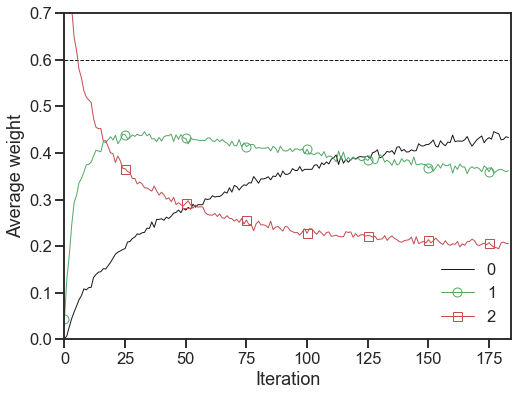

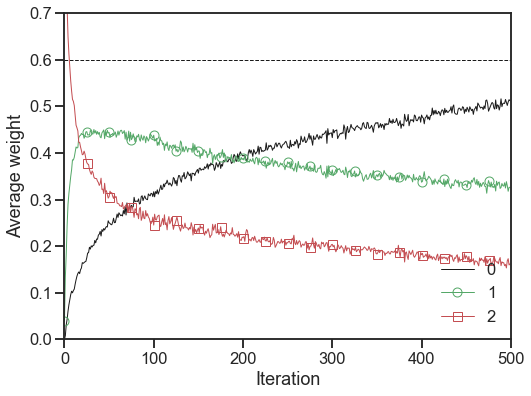

In [2]:
import sys

# Adding project folder to import modules
root = "C:/Users/LocalAdmin/OneDrive/leap_forward/phd_project/reb/code/mod/"
sys.path.append(root)

from solution.SolutionComparison import SolutionComparison

comparison_distributions = SolutionComparison("C:/Users/LocalAdmin/OneDrive/leap_forward/phd_project/reb/code/mod/config/A3_A4_1st_class_distribution/category_comparison/input/compare_distributions_A3_A4.json")

for source, label in comparison_distributions.get_source_label_pair_list():
    save_weight_graph(
        source,
        folder_output=comparison_distributions.output_path,
        label=SolutionComparison.get_standard_label(label)
    )